# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajandosanjh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajandosanjh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajandosanjh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rajandosanjh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
#!pip install wordcloud

In [35]:
#!pip install vaderSentiment

In [23]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [24]:
df = pd.DataFrame()
df["reviews"] = reviews
df["row_id"] = df.index + 1
df.head()

,reviews,row_id
0,✅ Trip Verified | Stinking nappies being chang...,1
1,✅ Trip Verified | Worst service ever. Lost bag...,2
2,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,3
3,✅ Trip Verified | Not a great experience. I co...,4
4,Not Verified | I was excited to fly BA as I'd ...,5


In [25]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [26]:
#preprocessing
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews,row_id
0,Stinking nappies being changed in business ca...,1
1,Worst service ever. Lost baggage because of d...,2
2,BA 246 21JAN 2023 Did not appreciate the unp...,3
3,Not a great experience. I could not check in ...,4
4,I was excited to fly BA as I'd not travelled ...,5
...,...,...
995,London to Johannesburg. Since the aircraft w...,996
996,"Doha to London Heathrow. Flight on time, not...",997
997,Miami to Tel Aviv via London. At Miami airpo...,998
998,London to Seoul. I normally fly business but...,999


In [27]:
def sort(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(sort)
df.head()

,reviews,row_id,Cleaned Reviews
0,Stinking nappies being changed in business ca...,1,Stinking nappies being changed in business ca...
1,Worst service ever. Lost baggage because of d...,2,Worst service ever Lost baggage because of de...
2,BA 246 21JAN 2023 Did not appreciate the unp...,3,BA JAN Did not appreciate the unprofessional ...
3,Not a great experience. I could not check in ...,4,Not a great experience I could not check in o...
4,I was excited to fly BA as I'd not travelled ...,5,I was excited to fly BA as I d not travelled ...


In [28]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rajandosanjh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rajandosanjh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,row_id,Cleaned Reviews,POS tagged
0,Stinking nappies being changed in business ca...,1,Stinking nappies being changed in business ca...,"[(Stinking, v), (nappies, n), (changed, v), (b..."
1,Worst service ever. Lost baggage because of d...,2,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v..."
2,BA 246 21JAN 2023 Did not appreciate the unp...,3,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes..."
3,Not a great experience. I could not check in ...,4,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (..."
4,I was excited to fly BA as I'd not travelled ...,5,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ..."


In [29]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,row_id,Cleaned Reviews,POS tagged,Lemma
0,Stinking nappies being changed in business ca...,1,Stinking nappies being changed in business ca...,"[(Stinking, v), (nappies, n), (changed, v), (b...",Stinking nappy change business cabin through...
1,Worst service ever. Lost baggage because of d...,2,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...
2,BA 246 21JAN 2023 Did not appreciate the unp...,3,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...
3,Not a great experience. I could not check in ...,4,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (...",great experience could check online two sepa...
4,I was excited to fly BA as I'd not travelled ...,5,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...


In [12]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Stinking nappies being changed in business ca...,Stinking nappy change business cabin through...
1,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage delayed flig...
2,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN appreciate unprofessional attitude pi...
3,Not a great experience. I could not check in ...,great experience could check online two sepa...
4,I was excited to fly BA as I'd not travelled ...,excite fly BA travel long haul yr travel Aus...
...,...,...
995,London to Johannesburg. Since the aircraft w...,London Johannesburg Since aircraft half full...
996,"Doha to London Heathrow. Flight on time, not...",Doha London Heathrow Flight time completely ...
997,Miami to Tel Aviv via London. At Miami airpo...,Miami Tel Aviv via London Miami airport Octo...
998,London to Seoul. I normally fly business but...,London Seoul normally fly business last minu...


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,row_id,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Stinking nappies being changed in business ca...,1,Stinking nappies being changed in business ca...,"[(Stinking, v), (nappies, n), (changed, v), (b...",Stinking nappy change business cabin through...,0.8115,Positive
1,Worst service ever. Lost baggage because of d...,2,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...,-0.9001,Negative
2,BA 246 21JAN 2023 Did not appreciate the unp...,3,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...,0.2960,Neutral
3,Not a great experience. I could not check in ...,4,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (...",great experience could check online two sepa...,0.9538,Positive
4,I was excited to fly BA as I'd not travelled ...,5,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...,0.7506,Positive


In [31]:
counts = df['Analysis'].value_counts()
counts

Analysis
Positive    480
Negative    414
Neutral     106
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x17bc2a9a0>,
 [Text(0.0690696084852792, 1.0978293989430645, 'Positive'),
  Text(-0.42414244547964414, -1.0149399913012331, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(0.03767433190106138, 0.598816035787126, '48.0%'),
  Text(-0.2313504248070786, -0.5536036316188544, '41.4%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

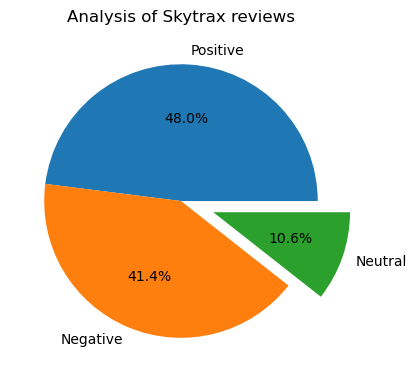

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Analysis of Skytrax reviews")
plt.pie(counts.values, labels = counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

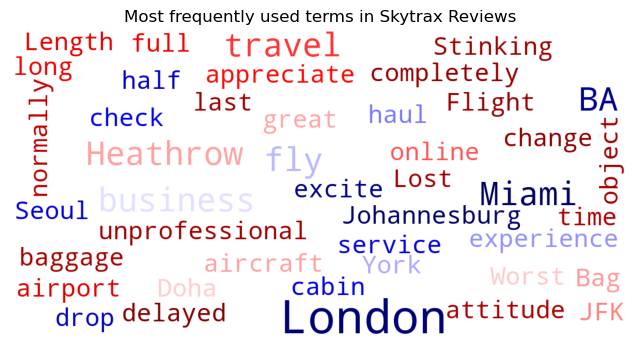

In [33]:
from wordcloud import WordCloud
stopwords = ['sepa', 'dtype', 'yr', 'New', 'Name', 'wel', 'Octo', 'Lemma', 'minu', 'pi', 'flig', 'JAN', 'Tel', 'Aviv', 'Aus', 'via',
            'two', 'nappy', 'Since', 'go', 'could', 'ever', 'through']

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1,
        colormap = 'seismic')

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title("Most frequently used terms in Skytrax Reviews")
    plt.show()


show_wordcloud(df.Lemma)